In [43]:
from data_resources import *
# import powerlaw
import os
path = '/Users/morpho/TURLIERLAB Dropbox/Hudson Rocha/Postdoc/LSPM/Python/localized-fracture/src/output/'
path = '/Users/morpho/Desktop/dataN2e4lf2/run0010/output/'
os.chdir(path)
cwd = os.getcwd()
print(cwd)
dirs = os.listdir(cwd)
for elem in os.listdir(cwd):
    if elem.endswith(".obj"):
        print(elem)
        filename = elem
        [alpha, sigma, xmin] = avalanche_distribution_from_obj(filename)
        print("alpha:",alpha,"sigma",sigma)
        plot_avalanche_from_obj(filename)
# print(alpha)

/Users/morpho/Desktop/dataN2e4lf2/run0010/output
N=20000_lbda=1.0_lbdaf=2.0_lbdaJ=2.0_rho=4.0.obj


AttributeError: Can't get attribute 'Data' on <module '__main__'>

/Users/morpho/TURLIERLAB Dropbox/Hudson Rocha/Postdoc/LSPM/Python/localized-fracture/src/output
N=10000_lbda=1.0_lbdaf=0.85_lbdaJ=0.5_rho=4.0
N=10000_lbda=1.0_lbdaf=0.9_lbdaJ=0.5_rho=4.0
N=10000_lbda=1.0_lbdaf=0.6_lbdaJ=0.5_rho=4.0
N=10000_lbda=1.0_lbdaf=1.0_lbdaJ=0.5_rho=4.0
N=10000_lbda=1.0_lbdaf=1.5_lbdaJ=0.5_rho=4.0


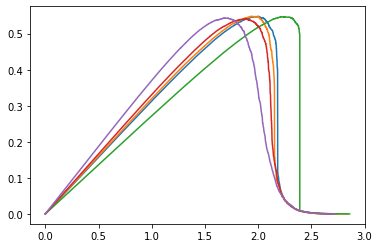

In [42]:
import os
import matplotlib.pyplot as plt

import numpy as np

path = '/Users/morpho/TURLIERLAB Dropbox/Hudson Rocha/Postdoc/LSPM/Python/localized-fracture/src/output/'
# path = '/Users/morpho/Desktop/dataN2e4lf2/run0010/output/'
os.chdir(path)
cwd = os.getcwd()
print(cwd)
dirs = os.listdir(cwd)
for elem in os.listdir(cwd):
    if elem.startswith("N"):
        print(elem)
        file = elem + '/stress-strain.csv'
        # fileObj = open(file, 'rb')
        # df = open(file)
        arr = np.loadtxt(file,
                 delimiter=",", dtype=float)
        plt.plot(arr[0],arr[1])
        # print(df)


        # filename = elem
        # [alpha, sigma, xmin] = avalanche_distribution_from_obj(filename)
        # print("alpha:",alpha,"sigma",sigma)
        # plot_avalanche_from_obj(filename)

Calculating best minimal value for power law fit
xmin progress: 98%

/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/powerlaw.py:1195: RuntimeWarning: divide by zero encountered in double_scalars
  C = 1.0/C
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:597: RuntimeWarning: invalid value encountered in subtract
  numpy.max(numpy.abs(fsim[0] - fsim[1:])) <= fatol):
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/powerlaw.py:840: RuntimeWarning: invalid value encountered in multiply
  likelihoods = f*C


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in power


alpha = 2.3462183918940798
sigma =  0.0029144115297375325
xmin =  1.0


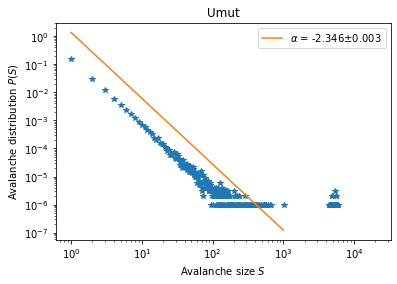

In [24]:
def plot_avalanche_Umut(filename):
    
    with open(filename, "r") as f:
        lines = f.readlines()

    N = 20000
    data = [float(elem.split( )[0]) for elem in lines]
    [number_of_avalanches, bins] = np.histogram(data, bins = np.arange(0,N))
    # [number_of_avalanches, bins] = np.histogram(data, bins=np.logspace(start=np.log10(10), stop=np.log10(N), num=20))
    plt.figure()
    plt.loglog(bins[0:-1], number_of_avalanches/sum(bins[0:-1]*number_of_avalanches), '*')

    plt.xlabel('Avalanche size 'r'$S$')
    plt.ylabel('Avalanche distribution 'r'$P(S)$')
    # results = powerlaw.Fit(lines)
    results = powerlaw.Fit(lines, xmin = None, xmax = 1000, discrete=True, verbose = True, estimate_discrete = True)
#     results = powerlaw.Fit(data, xmax = 1000, fit_method='KS')#,parameter_range=parameter_range,)

    alpha = results.power_law.alpha
#     alpha_2 = 2.25
    xmin = results.power_law.xmin
    xx = bins[0:1000]
    yy = ((alpha-1)/xmin)*(xx/xmin)**(-alpha)*1
#     yy2 = ((alpha_2-1)/xmin)*(xx/xmin)**(-alpha_2)*100000
    plt.loglog(xx[int(results.power_law.xmin):-1], yy[int(results.power_law.xmin):-1], label = r'$\alpha$ = -'+str(round(results.power_law.alpha,3)) +r'$\pm$'+str(round(results.power_law.sigma,3)))
#     plt.loglog(xx[int(results.power_law.xmin):-1], yy2[int(results.power_law.xmin):-1], label = r'$\alpha$ = -2.25')
    plt.legend()
    plt.title('Umut')
    print('alpha =', results.power_law.alpha)
    print('sigma = ', results.power_law.sigma)
    print('xmin = ', xmin)
    return [bins[0:-1], number_of_avalanches]
    

path = '/Users/morpho/TURLIERLAB Dropbox/Hudson Rocha/Postdoc/LSPM/Python/dataUmut/set1a/'

elem=path+"avalanche_sizes_l_1_lj_4_lf_1_N_10000.dat"
    
[x_umut, y_umut] = plot_avalanche_Umut(elem)









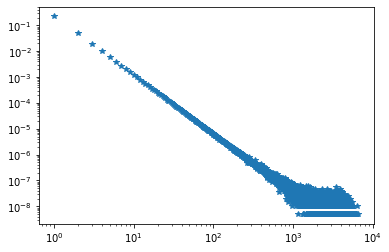

In [ ]:
def plot_from_csv(filename, binned = False):
    with open(filename, "r") as f:
        lines = f.readlines()
        b = lines[0]
        a = lines[1]
        bins = np.array(b.strip().split(','))
        avalanche = np.array(a.strip().split(','))
        x = bins.astype(np.float64)
        y = avalanche.astype(np.float64)
        
    data = np.repeat(x.astype(int),y.astype(int))
    N = 20000
    
    
    [number_of_avalanches, bins] = np.histogram(data, bins=np.logspace(start=np.log10(1), stop=np.log10(N), num=20))
    
    # N = 10000
#     data = [float(elem.split( )[0]) for elem in lines]

    # plt.loglog(bins[1:],number_of_avalanches/sum(bins[1:]*number_of_avalanches),'*')
    
    plt.loglog(x,y/sum(x*y),'*')

def get_power_law_data_from_csv(filename, xmin = 13, xmax = 1000):
    with open(filename, "r") as f:
        lines = f.readlines()
        b = lines[0]
        a = lines[1]
        bins = np.array(b.strip().split(','))
        avalanche = np.array(a.strip().split(','))
        x = bins.astype(int)
        y = avalanche.astype(int)
        
    # N = 20000
    data = np.repeat(x.astype(int),y.astype(int))
    results = powerlaw.Fit(data, xmin = None, xmax = None, discrete=True, verbose = True, estimate_discrete = True)
  
    # [number_of_avalanches, bins] = np.histogram(data, bins=np.logspace(start=np.log10(1), stop=np.log10(N), num=21))
    # N = 10000
#     data = [float(elem.split( )[0]) for elem in lines]

    results = powerlaw.Fit(data, xmin = xmin, xmax = xmax, discrete=True, verbose = True, estimate_discrete = True)#, xmin = 20, xmax = 1000)#,xmin = 20, xmax = 1000,  fit_method='KS')
    alpha = results.power_law.alpha
    xmin = results.power_law.xmin
    sigma = results.power_law.sigma

    xx = x
#     if float(filename[43:46]) == 0: 
#         alpha = - 2
#         yy = ((alpha-1)/xmin)*(xx/xmin)**(-alpha)/10
#         plt.loglog(xx[0:200], yy[0:200], label = r'$\alpha$ = -2')

    yy = ((alpha-1)/xmin)*(xx/xmin)**(-alpha)/10
    plt.figure()
    plt.loglog(x,y/sum(x*y),'*')
    plt.loglog(xx,yy/sum(xx*yy),'-')

    return [alpha, sigma, xmin]
filename = '/Users/morpho/TURLIERLAB Dropbox/Hudson Rocha/Postdoc/LSPM/Python/dataUmut/AllData/avalanche_sizes_l_1_lj_0.5_lf_0.9_N_20000.csv'
plot_from_csv(filename)



In [81]:
[alpha, sigma, xmin] = get_power_law_data_from_csv(filename)
print(alpha, sigma, xmin)

Calculating best minimal value for power law fit
2.3081354478759084 0.0011007685175942424 13.0


In [8]:
power_law_fit_options = {
  "xmin": None,
  "xmax": 1000,
}
print(type(power_law_fit_options["xmin"]))
print('xmin = '+ str(power_law_fit_options["xmin"])+ ", xmax = "+ str(power_law_fit_options["xmax"]))

<class 'NoneType'>
xmin = None, xmax = 1000


In [1]:
def plot_avalanche(filename, lj, power_law_fit_options):
    
    with open(filename, "r") as f:
        lines = f.readlines()
        b = lines[0]
        a = lines[1]
        bins = np.array(b.strip().split(','))
        avalanche = np.array(a.strip().split(','))
        x = bins.astype(int)
        y = avalanche.astype(int)

    plt.figure()

    plt.loglog(x,y/sum(x*y),'*', label = r'$\lambda_f=$'+ str(lj)) #brittle
#     plt.loglog(x,y,'*', label = filename[38:47])
    plt.xlabel('Avalanche size 'r'$S$')
    plt.ylabel('Avalanche distribution 'r'$P(S)$')
    data = np.repeat(x.astype(int),y.astype(int))
    results = powerlaw.Fit(data, xmin = power_law_fit_options["xmin"], xmax = power_law_fit_options["xmax"], discrete=True, verbose = False, estimate_discrete = True)
    # results = powerlaw.Fit(data,xmin = 1, xmax = 300, fit_method='KS')#,parameter_range=parameter_range,)

    alpha = results.power_law.alpha
    xmin = results.power_law.xmin
    
    if power_law_fit_options["xmax"] != None:
        xx = bins[0:power_law_fit_options["xmax"] ]
    else:
        xx = bins[0:1000]
    xx = np.asarray([int(i) for i in xx])

    # print(xx)
    yy = ((alpha-1)/xmin)*(xx/xmin)**(-alpha)*1
    
    plt.loglog(xx, yy, label = r'$\alpha$ = -'+str(round(results.power_law.alpha,3)) +r'$\pm$'+str(round(results.power_law.sigma,3)))
    plt.legend()
    plt.savefig(filename[:-4]+'.pdf')
    plt.close()
    # plt.show()
    print('alpha =', results.power_law.alpha)
    print('sigma =', results.power_law.sigma)
    return [results.power_law.alpha, results.power_law.sigma] 


import os, sys, csv
import numpy as np
import matplotlib.pyplot as plt
import time
import pylab as pl
import powerlaw
import tikzplotlib
import math

from math import log

from IPython import display

path = '/Users/morpho/TURLIERLAB Dropbox/Hudson Rocha/Postdoc/LSPM/Python/dataUmut/hundson_n_20000/'

power_law_fit_options = {
  "xmin": 10,
  "xmax": 1000,
}
os.chdir(path)

cwd = os.getcwd()
print(cwd)
dirs = os.listdir(cwd)
i = 0
# Getting lj from the name
start = 'lj_'
end = '_lf'

# Getting lf from the name
start = 'lf_'
end = '_N'


Lj = [] 
Alpha = []
Sigma = []
for elem in dirs:
    if elem.endswith(".csv") and elem.startswith("ava"):
        print(elem)
#         os.system('cd ' + path + machine)
#         os.chdir(path + machine)
#         cwd = os.getcwd()
#         filename = os.listdir(cwd)[1]
#         print(filename)
#         SaveHistogram(elem)
        lj = float(elem[elem.find(start)+len(start):elem.rfind(end)])
        [alpha, sigma] = plot_avalanche(elem, lj, power_law_fit_options)

        Lj = np.append(Lj, lj)
        Alpha = np.append(Alpha, alpha)
        Sigma = np.append(Sigma, sigma)
        

plt.figure()
plt.errorbar(Lj[:], Alpha[:], Sigma[:], linestyle='None', fmt='s')
plt.ylim([2.1,2.6])
plt.ylabel('Exponent')
plt.title('xmin = '+ str(power_law_fit_options["xmin"])+ ", xmax = "+ str(power_law_fit_options["xmax"]))
plt.savefig('xmin = '+ str(power_law_fit_options["xmin"])+ ", xmax = "+ str(power_law_fit_options["xmax"]) + 'avalanche_exponents.pdf')
plt.show()


/Users/morpho/TURLIERLAB Dropbox/Hudson Rocha/Postdoc/LSPM/Python/dataUmut/hundson_n_20000
avalanche_sizes_l_1_lj_0.5_lf_1_N_20000.csv
alpha = 2.2491727788110643
sigma = 0.0007775327060176228
avalanche_sizes_l_1_lj_0.5_lf_0.8_N_20000.csv
alpha = 2.4207845245566784
sigma = 0.001217998368274441
avalanche_sizes_l_1_lj_0.5_lf_0.825_N_20000.csv
alpha = 2.4163011078903347
sigma = 0.0011635168308367849
avalanche_sizes_l_1_lj_0.5_lf_0.875_N_20000.csv


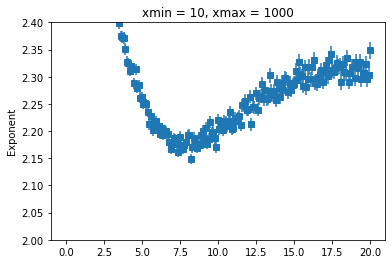

In [22]:
plt.figure()
plt.errorbar(Lj[:], Alpha[:], Sigma[:], linestyle='None', fmt='s')
plt.ylim([2.,2.4])
plt.ylabel('Exponent')
plt.title('xmin = '+ str(power_law_fit_options["xmin"])+ ", xmax = "+ str(power_law_fit_options["xmax"]))
plt.savefig('avalanche_exponents.pdf')
plt.show()

In [131]:
with open('avalanche_sizes_l_1_lj_25_lf_2_N_20000.csv', "r") as f:
    lines = f.readlines()
    b = lines[0]
    a = lines[1]
    bins = np.array(b.strip().split(','))
    avalanche = np.array(a.strip().split(','))
    x = bins.astype(np.float)
    y = avalanche.astype(np.float)

    plt.figure()
    plt.loglog(x,y/sum(x*y),'*')#, label = r'$\lambda_J=$'+ filename[42:45]) #brittle
#     plt.loglog(x,y,'*', label = filename[38:47])
    plt.xlabel('Avalanche size 'r'$S$')
    plt.ylabel('Avalanche distribution 'r'$P(S)$')        

qi = np.linspace(1,5,20)
Y = y/sum(x*y)
nth_moment = np.zeros(20)
for i in range(len(qi)):
    ii = qi[i]
    nth_moment[i] = np.sum(x**ii * Y) 

print(np.log(nth_moment))
plt.figure()
plt.plot(qi,np.log(nth_moment)/np.log(20000))
print(nth_moment)

fy = np.log(nth_moment)/np.log(20000)
print(np.diff(fy)/np.diff(qi))

FileNotFoundError: [Errno 2] No such file or directory: 'avalanche_sizes_l_1_lj_25_lf_2_N_20000.csv'

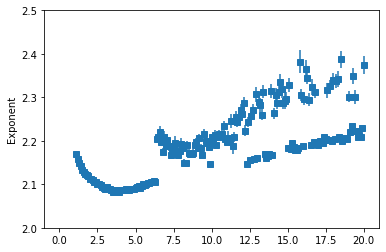

In [155]:
plt.figure()
plt.errorbar(Lj[:], Alpha[:], Sigma[:], linestyle='None', fmt='s')
plt.ylim([2.0,2.5])
plt.ylabel('Exponent')
plt.savefig('avalanche_exponents.pdf')
plt.show()

/Users/morpho/TURLIERLAB Dropbox/Hudson Rocha/Postdoc/LSPM/Python/dataUmut/set1a
2.3059196529269226 4.0


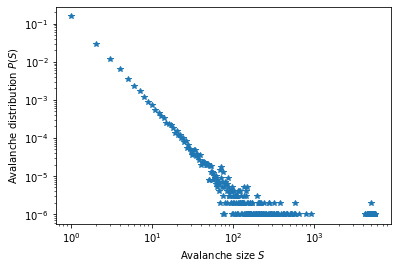

In [192]:
path = '/Users/morpho/TURLIERLAB Dropbox/Hudson Rocha/Postdoc/LSPM/Python/dataUmut/set1a/'

os.chdir(path)

cwd = os.getcwd()
print(cwd)
with open('avalanche_sizes_l_1_lj_3.36_lf_1_N_10000.csv', "r") as f:
    lines = f.readlines()
    b = lines[0]
    a = lines[1]
    bins = np.array(b.strip().split(','))
    avalanche = np.array(a.strip().split(','))
    x = bins.astype(int)
    y = avalanche.astype(int)
    data = np.repeat(x.astype(int),y.astype(int))
    results = powerlaw.Fit(data, xmin = None, xmax = None, discrete=True, verbose = False, estimate_discrete = True)
    # results = powerlaw.Fit(data,xmin = 1, xmax = 300, fit_method='KS')#,parameter_range=parameter_range,)

    alpha = results.power_law.alpha
    xmin = results.power_law.xmin
    print(alpha, xmin)

    plt.figure()
    plt.loglog(x,y/sum(x*y),'*')#, label = r'$\lambda_J=$'+ filename[42:45]) #brittle
#     plt.loglog(x,y,'*', label = filename[38:47])
    plt.xlabel('Avalanche size 'r'$S$')
    plt.ylabel('Avalanche distribution 'r'$P(S)$')        



/Users/morpho/TURLIERLAB Dropbox/Hudson Rocha/Postdoc/LSPM/Python/DataFromCluster/schwartz/Ductile075N10000
0.625


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.625, and alpha = 2.355136565561554
0.55


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.55, and alpha = 2.353536431210201
0.35


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.35, and alpha = 2.3506604479117197
0.325


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.325, and alpha = 2.3468118993088627
1.0


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 1.0, and alpha = 2.3406342018011266
0.3


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.3, and alpha = 2.3314772317753754
0.375


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.375, and alpha = 2.3389791383878293
0.575


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.575, and alpha = 2.361071225467448
0.6


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.6, and alpha = 2.3575610107176823
0.975


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.975, and alpha = 2.317147204887891
0.15


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.15, and alpha = 2.2358651633995796
0.025
0.2


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.2, and alpha = 2.219583895938277
0.925


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.925, and alpha = 2.327223634638524
0.75


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.75, and alpha = 2.330134241041933
0.775


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.775, and alpha = 2.3510908038560734
0.225


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.225, and alpha = 2.2785394394735494
0.9


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.9, and alpha = 2.337483033509719
0.0
0.95


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.95, and alpha = 2.328747446295837
0.175


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.175, and alpha = 2.183218842301809
0.525


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.525, and alpha = 2.3448604485091966
0.65


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.65, and alpha = 2.350015981072223
0.475


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.475, and alpha = 2.3422504276734366
0.25


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.25, and alpha = 2.2932621024021422
0.425


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.425, and alpha = 2.350579719143616
0.7


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.7, and alpha = 2.3317473532868416
0.4


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.4, and alpha = 2.3592492312588806
0.725


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.725, and alpha = 2.3530023110775655
0.275


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.275, and alpha = 2.32120654713373
0.675


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.675, and alpha = 2.3489695713912973
0.45


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.45, and alpha = 2.3511930293043353
0.5


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.5, and alpha = 2.347001937184352
0.05


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.05, and alpha = 2.2766683193965314
0.125


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.125, and alpha = 2.246288277204832
0.825


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.825, and alpha = 2.34017272012891
0.85


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.85, and alpha = 2.342938494060336
0.875


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.875, and alpha = 2.286890345910294
0.8


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.8, and alpha = 2.2955616185503835
0.1


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.1, and alpha = 2.2507035884807878
0.075


/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':
/Users/morpho/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

Calculating best minimal value for power law fit
Lj = 0.075, and alpha = 2.249147933254089


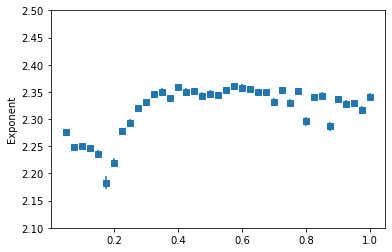

In [5]:
def plot_avalanche(filename, lj):
    
    with open(filename, "r") as f:
        lines = f.readlines()
        b = lines[0]
        a = lines[1]
        bins = np.array(b.strip().split(','))
        avalanche = np.array(a.strip().split(','))
        x = bins.astype(np.int)
        y = avalanche.astype(np.int)

    plt.figure()
#     plt.loglog(x,y/sum(x*y),'*', label = r'$\lambda_J=$'+filename[46:50]) #critical
#     plt.loglog(x,y/sum(x*y),'*', label = r'$\lambda_J=$'+filename[43:46]) #ductile
#     plt.loglog(x,y/sum(x*y),'*', label = r'$\lambda_J=$'+ str(lj)) #brittle
    plt.loglog(x,y/sum(x*y),'*', label = r'$\lambda_J=$'+ str(lj)) #brittle

    plt.xlabel('Avalanche size 'r'$S$')
    plt.ylabel('Avalanche distribution 'r'$P(S)$')
#     plt.title('Ductile')
    data = np.repeat(x.astype(int),y.astype(int))
    # results = powerlaw.Fit(data)
    results = powerlaw.Fit(data, xmin = None, xmax = None, discrete=True, verbose = True, estimate_discrete = True)
    # results = powerlaw.Fit(data,xmin = 1, xmax = 300, fit_method='KS')#,parameter_range=parameter_range,)

    alpha = results.power_law.alpha
    sigma = results.power_law.sigma
    
    xmin = results.power_law.xmin
    xx = x


    yy = ((alpha-1)/xmin)*(xx/xmin)**(-alpha)/1
    plt.loglog(xx[int(results.power_law.xmin):300], yy[int(results.power_law.xmin):300], label = r'$\alpha$ = -'+str(round(results.power_law.alpha,3)) +r'$\pm$'+str(round(results.power_law.sigma,3)))
    plt.legend()
    plt.savefig(filename[:-4]+'.pdf')
    plt.close()
#     plt.loglog(xx[int(results.power_law.xmin):100], yy[int(results.power_law.xmin):100], label = r'$\alpha$ = -'+str(round(results.power_law.alpha,3)) +r'$\pm$'+str(round(results.power_law.sigma,3)))

#     plt.legend()
#     plt.savefig(filename+'.pdf')
#     tikzplotlib.save(filename +'.tex')
#     plt.show()
#     plt.close()
#     print('alpha =', results.power_law.alpha)
#     print('sigma =', results.power_law.sigma)
#     print('D = ',results.power_law.D)
    return [alpha, sigma]


    


import os, sys, csv
import powerlaw
import numpy as np
import matplotlib.pyplot as plt
import time
import pylab as pl
import powerlaw
from IPython import display
import tikzplotlib


machine = '/schwartz/Ductile075N10000/'
path = '/Users/morpho/TURLIERLAB Dropbox/Hudson Rocha/Postdoc/LSPM/Python/DataFromCluster'
os.chdir(path + machine)

cwd = os.getcwd()
print(cwd)
dirs = os.listdir(cwd)
i = 0

Lj = []
Alpha = []
Sigma = []

for elem in dirs:
    if elem.startswith("run"):
        os.system('cd ' + path + machine)
        os.chdir(path + machine + elem)
        with open('config.conf') as myfile:
            for i, line in enumerate(myfile):
                if i == 9:
                    # 10th line 
                    lj = float(line[10:])
                    print(lj)
 

        os.system('cd ' + path + machine + elem + 'output/')
        os.chdir(path + machine + elem + '/output/')
        

        cwd = os.getcwd()
        try:
            if i%1 ==0:
                for file in os.listdir(cwd):
                    if file.endswith('.csv'):
                        [alpha,sigma] = plot_avalanche(file, lj)
                        Lj = np.append(Lj, lj)
                        Alpha = np.append(Alpha, alpha)
                        Sigma = np.append(Sigma, sigma)
                        print("Lj = {}, and alpha = {}".format(lj,alpha))
                        
        except:
            pass

        i+=1





os.chdir(path + machine)

plt.errorbar(Lj[:], Alpha[:], Sigma[:], linestyle='None', fmt='s')
plt.ylim((2.1, 2.5))
# plt.ylim([2.2,2.6])
plt.ylabel('Exponent')
plt.savefig('avalanche_exponents.pdf')
plt.show()
#     subprocess.call(['cd '+ elem], shell = True)    
#         write_s(jobname, confname, script, elem, n)
#     subprocess.call([subcmd + ' ' + submitname], shell = True)

# for i in range(0, 72):
#     with open('data/data_no_polymerization/run00' + str(i).zfill(2)+ '/output/final_radius.csv', 'r') as file:
#         reader = csv.reader(file)
#         for row in reader:
#             [contractility, radius] = row
#             Contractility[i] = float(contractility) 
#             Radius[i] = 0. if float(radius) < 0.06 else float(radius)
#             Radius[i] = 1. if float(radius) >1. else Radius[i]

# print(type(bins))
# yy = ((alpha-1)/xmin)*(x/xmin)**(-alpha)
# plt.loglog(x, yy, label = r'$\alpha$ = -'+str(round(results.power_law.alpha,3)) +r'$\pm$'+str(round(results.power_law.sigma,3)))
# plt.xlabel(r'$\Delta$',fontsize=20)
# plt.ylabel(r'$D(\Delta)$', fontsize = 20)
# plt.legend()
# tikzplotlib.save('Avalanche'+ filename +'.tex')
# plt.savefig('Avalanche'+ filename +'.pdf')